# test network

In [1]:
import sys
sys.path.append( '../sources/' )
import network
import sumolib
import pandas as pd

In [2]:
net1 = sumolib.net.readNet("../data/iland.net" ,withInternal=False)
mynet = network.Net()


In [3]:
mynet.importFromSumoNet(net1)

In [4]:
n = mynet.getNodes()[0]
n

In [5]:
n.getIncoming()[0].getID()

'-108805749'

In [6]:
n.getOutgoing()[0].getID()

'-100654481'

In [7]:
e = mynet.getEdges()[0]

In [8]:
e.getIncoming()[0].getShape()

[(14079.03, 10773.08),
 (14078.79, 10763.89),
 (14078.53, 10753.74),
 (14075.46, 10602.51),
 (14075.15, 10587.17)]

In [9]:
p = mynet.convertXY2LonLat(2136.13, 2152.54)
p

(17.913704658245155, 59.20968447025572)

In [10]:
mynet.convertLonLat2XY(*p)

(2136.1299999999464, 2152.539999999106)

In [11]:
r = 40
for e, dist in mynet.getNeighboringEdges(*(2130,2130), r=r):
    print(e, dist)

In [12]:
e_from = e.getIncoming()[0]
e_from

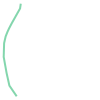

In [13]:
network.getGeoShape(e, mynet, fromedge=e_from)

In [14]:
network.combineShapesSumo(e,fromedge=e_from)

[(14075.15, 10587.17),
 (14073.9, 10576.76),
 (14063.22, 10544.89),
 (14061.87, 10540.61),
 (14059.85, 10534.18),
 (14057.67, 10526.48),
 (14055.23, 10516.63),
 (14052.92, 10502.22),
 (14051.16, 10472.2),
 (14051.77, 10459.73),
 (14052.08, 10453.2),
 (14052.86, 10437.16),
 (14054.79, 10409.68),
 (14061.88, 10386.17)]

In [15]:
e.getShape()

[(14075.15, 10587.17),
 (14073.9, 10576.76),
 (14063.22, 10544.89),
 (14061.87, 10540.61),
 (14059.85, 10534.18),
 (14057.67, 10526.48),
 (14055.23, 10516.63),
 (14052.92, 10502.22),
 (14051.16, 10472.2),
 (14051.77, 10459.73),
 (14052.08, 10453.2),
 (14052.86, 10437.16),
 (14054.79, 10409.68),
 (14061.88, 10386.17)]

In [16]:
e_from.getShape()

[(14079.03, 10773.08),
 (14078.79, 10763.89),
 (14078.53, 10753.74),
 (14075.46, 10602.51),
 (14075.15, 10587.17)]

In [17]:
e_from.getIncoming()[0].getShape()

[(13967.95, 10942.06),
 (13971.04, 10932.32),
 (13973.86, 10927.13),
 (13979.34, 10917.05),
 (13980.39, 10915.11),
 (13993.76, 10898.8),
 (14002.72, 10890.17),
 (14008.81, 10886.08),
 (14024.8, 10877.29),
 (14040.9, 10867.59),
 (14052.81, 10856.38),
 (14062.13, 10842.08),
 (14069.27, 10826.65),
 (14075.24, 10809.14),
 (14076.28, 10797.64),
 (14077.44, 10772.9)]

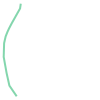

In [18]:
network.getGeoShape(e,net=mynet)

#  test cleaning data

In [19]:
import numpy as np
from cleandata import cleaningData
import zipfile

In [20]:
net1 = sumolib.net.readNet("../data/iland.net" ,withInternal=False)
mynet = network.Net()
mynet.importFromSumoNet(net1)
zf = zipfile.ZipFile('../data/gps_inside_island.zip') 
gps = pd.read_csv(zf.open("gps_inside_island.csv"),dtype={"trip_id":object,
                                                              "shape_id":object,
                                                              "route_id":object,
                                                             "vehicle_id":object,
                                                             "timestamp":int,
                                                             "direction_id":int,
                                                             "lat":float,
                                                             "lon":float,
                                                             "speed":float,
                                                             "bearing":int,
                                                             "inside":bool,
                                                             "trip_id _extended":object})

unique_trip = list(gps["trip_id_extended"].unique())

In [21]:
sample_gps = gps[gps["trip_id_extended"]==unique_trip[3300]].sort_values("timestamp").drop_duplicates()
#sample_gps = sample_gps.reset_index(drop=True)[["lon","lat","timestamp","bearing","speed"]]

sample_gps

,vehicle_id,timestamp,trip_id,route_id,direction_id,lat,lon,speed,bearing,shape_id,inside,trip_id_extended
2280772,9031001001002650,1685948816,14010000630847520,9011001041300000,1,59.319756,18.075062,0.0,124,1014010000630609140,True,14010000630847520_0
2280775,9031001001002650,1685948818,14010000630847520,9011001041300000,1,59.319756,18.075062,0.0,124,1014010000630609140,True,14010000630847520_0
2280776,9031001001002650,1685948820,14010000630847520,9011001041300000,1,59.319756,18.075062,0.0,124,1014010000630609140,True,14010000630847520_0
2280778,9031001001002650,1685948822,14010000630847520,9011001041300000,1,59.319756,18.075062,0.0,124,1014010000630609140,True,14010000630847520_0
2280780,9031001001002650,1685948825,14010000630847520,9011001041300000,1,59.319756,18.075062,0.0,124,1014010000630609140,True,14010000630847520_0
...,...,...,...,...,...,...,...,...,...,...,...,...
2281541,9031001001002650,1685949588,14010000630847520,9011001041300000,1,59.313957,18.102425,13.3,93,1014010000630609140,True,14010000630847520_0
2281543,9031001001002650,1685949590,14010000630847520,9011001041300000,1,59.313938,18.102879,12.5,95,1014010000630609140,True,14010000630847520_0
2281545,9031001001002650,1685949592,14010000630847520,9011001041300000,1,59.313911,18.103291,11.9,98,1014010000630609140,True,14010000630847520_0
2281547,9031001001002650,1685949594,14010000630847520,9011001041300000,1,59.313858,18.103683,11.4,105,1014010000630609140,True,14010000630847520_0


In [22]:
df = cleaningData(sample_gps,mynet)
df

,id,x,y,timestamp,speed,bearing,stopindex
0,0,11880.854571,13978.530447,1685948816,0.0,124,1
1,0,11880.854571,13978.530447,1685948818,0.0,124,1
2,0,11880.854571,13978.530447,1685948820,0.0,124,1
3,0,11880.854571,13978.530447,1685948822,0.0,124,1
4,0,11880.854571,13978.530447,1685948825,0.0,124,1
...,...,...,...,...,...,...,...
349,0,13410.373280,13273.207648,1685949588,13.3,93,0
350,0,13436.107670,13269.960900,1685949590,12.5,95,0
351,0,13459.417795,13265.969154,1685949592,11.9,98,0
352,0,13481.513503,13259.053061,1685949594,11.4,105,0


In [23]:
df.to_csv("cleanedtrajectory.csv", index=False)

# test enrich data

In [24]:
from cleandata import richdata
from geotools import dfPoint2LonLat

In [25]:
sample_gps = gps[gps["trip_id_extended"]==unique_trip[2530]].sort_values("timestamp").drop_duplicates()
sample_gps = sample_gps.reset_index(drop=True)
sample_gps

,vehicle_id,timestamp,trip_id,route_id,direction_id,lat,lon,speed,bearing,shape_id,inside,trip_id_extended
0,9031001001004012,1685966492,14010000623439929,9011001000400000,0,59.303558,18.079140,11.4,342,1014010000623425442,True,14010000623439929_0
1,9031001001004012,1685966494,14010000623439929,9011001000400000,0,59.303757,18.079018,11.4,342,1014010000623425442,True,14010000623439929_0
2,9031001001004012,1685966496,14010000623439929,9011001000400000,0,59.303951,18.078894,11.7,342,1014010000623425442,True,14010000623439929_0
3,9031001001004012,1685966498,14010000623439929,9011001000400000,0,59.304150,18.078768,11.7,342,1014010000623425442,True,14010000623439929_0
4,9031001001004012,1685966500,14010000623439929,9011001000400000,0,59.304352,18.078644,11.7,342,1014010000623425442,True,14010000623439929_0
...,...,...,...,...,...,...,...,...,...,...,...,...
474,9031001001004012,1685967508,14010000623439929,9011001000400000,0,59.318768,18.032166,7.8,351,1014010000623425442,True,14010000623439929_0
475,9031001001004012,1685967511,14010000623439929,9011001000400000,0,59.318985,18.032099,8.6,351,1014010000623425442,True,14010000623439929_0
476,9031001001004012,1685967514,14010000623439929,9011001000400000,0,59.319141,18.032032,9.2,347,1014010000623425442,True,14010000623439929_0
477,9031001001004012,1685967516,14010000623439929,9011001000400000,0,59.319397,18.031898,10.3,344,1014010000623425442,True,14010000623439929_0


In [26]:
df  = richdata(sample_gps,mynet, alpha=.7)
df = dfPoint2LonLat(df, mynet)
df.head()

,id,timestamp,speed,bearing,stopindex,lon,lat
0,0,1685966492,11.582420,345.043530,0,18.079140,59.303558
1,0,1685966494,11.439408,344.598304,0,18.079018,59.303757
2,0,1685966496,11.523337,344.416486,0,18.078894,59.303952
3,0,1685966498,11.781406,344.922684,0,18.078768,59.304149
4,0,1685966500,11.554198,344.954263,0,18.078643,59.304350


In [27]:
df1 = df.merge(sample_gps, on="timestamp")
df1 = df1.rename(columns={"lon_y":"lon", "lat_y":"lat"})
df1 .to_csv("test.csv")

In [28]:
df1.iloc[0]

id                                    0
timestamp                    1685966492
speed_x                        11.58242
bearing_x                     345.04353
stopindex                             0
lon_x                          18.07914
lat_x                         59.303558
vehicle_id             9031001001004012
trip_id               14010000623439929
route_id               9011001000400000
direction_id                          0
lat                           59.303558
lon                            18.07914
speed_y                            11.4
bearing_y                           342
shape_id            1014010000623425442
inside                             True
trip_id_extended    14010000623439929_0
x                          12034.842757
y                          12173.849699
Name: 0, dtype: object

## The steps of the data riching and cleaning:
#### 1 - convert to x, y
#### 2 - remove outlier
#### 3 - smoothing vx and vy and update x,y
#### 4 - calculate bearing and speed
#### 5 - assing zero to speeds less than MINSPEED_FOR_MOVING
#### 6 - update bearings based on speeds less than MINSPEED_FOR_BEARING
#### 7 - assing stopindex and fix locations in stop cases

In [29]:
"""
MAX_SPEED_FOR_OUTLIER = 50

df1 = df.join(df.shift(-1).rename(columns={"timestamp":"timestamp2","x":"x2","y":"y2"}))
df1.at[df1.index[-1],"timestamp2"] = df1.iloc[-1]["timestamp"] + 1
df1.at[df1.index[-1],"x2"] = df1.iloc[-1]["x"]
df1.at[df1.index[-1],"y2"] = df1.iloc[-1]["y"]
df1["dist"] = df1.apply(lambda row: distance2d((row["x"],row["y"]),(row["x2"],row["y2"])), axis=1)
df1["dtime"] = df1.apply(lambda row: int(row["timestamp2"] - row["timestamp"]), axis=1)
df1["speed"] = df1.apply(lambda row: row["dist"]/row["dtime"], axis=1)
df2 = df1[df1["speed"]<MAX_SPEED_FOR_OUTLIER].reset_index(drop=True)
"""

'\nMAX_SPEED_FOR_OUTLIER = 50\n\ndf1 = df.join(df.shift(-1).rename(columns={"timestamp":"timestamp2","x":"x2","y":"y2"}))\ndf1.at[df1.index[-1],"timestamp2"] = df1.iloc[-1]["timestamp"] + 1\ndf1.at[df1.index[-1],"x2"] = df1.iloc[-1]["x"]\ndf1.at[df1.index[-1],"y2"] = df1.iloc[-1]["y"]\ndf1["dist"] = df1.apply(lambda row: distance2d((row["x"],row["y"]),(row["x2"],row["y2"])), axis=1)\ndf1["dtime"] = df1.apply(lambda row: int(row["timestamp2"] - row["timestamp"]), axis=1)\ndf1["speed"] = df1.apply(lambda row: row["dist"]/row["dtime"], axis=1)\ndf2 = df1[df1["speed"]<MAX_SPEED_FOR_OUTLIER].reset_index(drop=True)\n'

In [30]:
import numpy as np
from scipy.stats import gaussian_kde

def kernel_density_smoothing(data, bandwidth):
    kde = gaussian_kde(data, bw_method=bandwidth)
    smoothed_data = kde(data)
    return smoothed_data

# Example usage
original_data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
bandwidth = 3.0
smoothed_data = kernel_density_smoothing(original_data, bandwidth)
print(smoothed_data)

[0.00415553 0.00435524 0.00450371 0.0045952  0.00462611 0.0045952
 0.00450371 0.00435524 0.00415553]


In [31]:
import numpy as np
from scipy.ndimage import convolve1d

def convolution_smoothing(data, window_size):
    window = np.ones(window_size) / window_size
    smoothed_data = convolve1d(data, window, mode='nearest')
    return smoothed_data

# Example usage
original_data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
window_size = 3
smoothed_data = convolution_smoothing(original_data, window_size)
print(smoothed_data)

[13 20 30 40 49 60 70 80 86]


# test bezier

In [37]:
import ast
from geotools import distance2d,calculate_bearing_angle
from interpolation import interpolateTrajectory

In [38]:
df = pd.read_csv("../test/cleanedtrajectory.csv")#, converters={"point": ast.literal_eval})

In [39]:
df

,id,x,y,timestamp,speed,bearing,stopindex
0,0,11880.854571,13978.530447,1685948816,0.0,124,1
1,0,11880.854571,13978.530447,1685948818,0.0,124,1
2,0,11880.854571,13978.530447,1685948820,0.0,124,1
3,0,11880.854571,13978.530447,1685948822,0.0,124,1
4,0,11880.854571,13978.530447,1685948825,0.0,124,1
...,...,...,...,...,...,...,...
349,0,13410.373280,13273.207648,1685949588,13.3,93,0
350,0,13436.107670,13269.960900,1685949590,12.5,95,0
351,0,13459.417795,13265.969154,1685949592,11.9,98,0
352,0,13481.513503,13259.053061,1685949594,11.4,105,0


In [40]:
out = interpolateTrajectory(df, sample_rate=1)
out

,x,y,timestamp,speed,bearing,type,stopindex
0,11880.854571,13978.530447,1685948816,0.000000,124.000000,origin,1.0
1,11880.854571,13978.530447,1685948817,0.000000,124.000000,extra,1.0
2,11880.854571,13978.530447,1685948818,0.000000,124.000000,origin,1.0
3,11880.854571,13978.530447,1685948818,0.000000,124.000000,origin,1.0
4,11880.854571,13978.530447,1685948819,0.000000,124.000000,extra,1.0
...,...,...,...,...,...,...,...
1124,13436.107670,13269.960900,1685949590,12.217893,95.000000,origin,0.0
1125,13448.203909,13268.241044,1685949591,11.441709,107.191906,extra,0.0
1127,13459.417795,13265.969154,1685949592,11.861448,98.000000,origin,0.0
1128,13470.939446,13263.150377,1685949593,11.340135,119.659714,extra,0.0


In [41]:
out.to_csv("interpolatedtrajectory.csv")

In [42]:
#from geotools import dfPoint2LonLat

In [43]:
#dfPoint2LonLat(out, mynet )

# test map matching

In [44]:
from mapmatching import MapMatcher

In [45]:
interpolatedtraj = pd.read_csv("interpolatedtrajectory.csv")
interpolatedtraj

,Unnamed: 0,x,y,timestamp,speed,bearing,type,stopindex
0,0,11880.854571,13978.530447,1685948816,0.000000,124.000000,origin,1.0
1,1,11880.854571,13978.530447,1685948817,0.000000,124.000000,extra,1.0
2,2,11880.854571,13978.530447,1685948818,0.000000,124.000000,origin,1.0
3,3,11880.854571,13978.530447,1685948818,0.000000,124.000000,origin,1.0
4,4,11880.854571,13978.530447,1685948819,0.000000,124.000000,extra,1.0
...,...,...,...,...,...,...,...,...
952,1124,13436.107670,13269.960900,1685949590,12.217893,95.000000,origin,0.0
953,1125,13448.203909,13268.241044,1685949591,11.441709,107.191906,extra,0.0
954,1127,13459.417795,13265.969154,1685949592,11.861448,98.000000,origin,0.0
955,1128,13470.939446,13263.150377,1685949593,11.340135,119.659714,extra,0.0


In [46]:
matcher = MapMatcher(mynet)
matcher.match(interpolatedtraj)

decision index start = 0
['585698150']
decision index = 320
['585698150', '803487169']
decision index = 353
['585698150', '803487169', '585698150']
offset = 277.1000819171648, polygon length = 277.10008191716474


ValueError: offset is greater than polygon length.

In [ ]:
matcher.matchdf

In [ ]:
matcher.save_routematch()